### Data leakage, imbalanced datasets,cross validation, pipelines

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [9]:
df= pd.DataFrame(np.random.rand(100,5))

df['customer_id']= range(1,101)

df['label'] = [1]*25 + [0]*75

df.head()

,0,1,2,3,4,customer_id,label
0,0.922103,0.057794,0.526038,0.148553,0.568629,1,1
1,0.327477,0.820193,0.959226,0.419158,0.289422,2,1
2,0.015102,0.064755,0.877044,0.400378,0.466417,3,1
3,0.368077,0.896085,0.572603,0.500439,0.736777,4,1
4,0.584785,0.882418,0.336971,0.228047,0.982025,5,1


In [10]:
X =df.drop(columns='label')
y=df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.33, random_state=42)

In [11]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00         9

   micro avg       1.00      1.00      1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



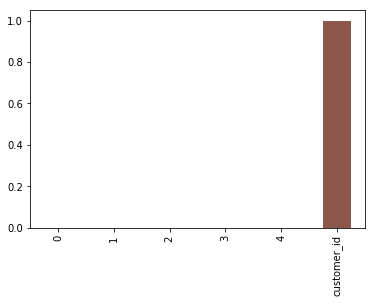

In [14]:
pd.Series(index=X.columns, data=model.feature_importances_).plot('bar');

In [12]:
df.head(40)

,0,1,2,3,4,customer_id,label
0,0.922103,0.057794,0.526038,0.148553,0.568629,1,1
1,0.327477,0.820193,0.959226,0.419158,0.289422,2,1
2,0.015102,0.064755,0.877044,0.400378,0.466417,3,1
3,0.368077,0.896085,0.572603,0.500439,0.736777,4,1
4,0.584785,0.882418,0.336971,0.228047,0.982025,5,1
5,0.351409,0.713414,0.452940,0.687918,0.415270,6,1
6,0.221729,0.022390,0.704187,0.787040,0.811190,7,1
7,0.017000,0.134116,0.788072,0.501306,0.686186,8,1
8,0.503838,0.373508,0.741935,0.597098,0.458992,9,1
9,0.932887,0.331860,0.702883,0.884695,0.383202,10,1


### Imbalanced Dataset

In [15]:
!pip install imbalanced-learn

In [16]:
from imblearn.datasets import fetch_datasets

In [17]:
data= fetch_datasets()['wine_quality']

In [18]:
X = data.data
y = data.target

In [19]:
X.shape

(4898, 11)

In [20]:
pd.Series(y).value_counts()

-1    4715
 1     183
dtype: int64

In [21]:
# %of -1 & 1

pd.Series(y).value_counts()/X.shape[0]*100

-1    96.263781
 1     3.736219
dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.33, random_state=42)

In [24]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.98      0.97      0.97      1564
           1       0.27      0.32      0.30        53

   micro avg       0.95      0.95      0.95      1617
   macro avg       0.63      0.65      0.63      1617
weighted avg       0.95      0.95      0.95      1617



### Random Oversample

### Wrong Way

In [25]:
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler(random_state =0)

X= data.data

y= data.target

X_resampled, y_resampled =ros.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled , test_size=0.33, random_state=42)

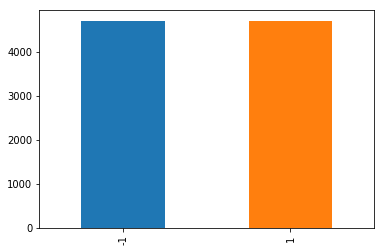

In [26]:
pd.Series(y_resampled).value_counts().plot('bar')

In [27]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.96      0.98      1556
           1       0.96      1.00      0.98      1556

   micro avg       0.98      0.98      0.98      3112
   macro avg       0.98      0.98      0.98      3112
weighted avg       0.98      0.98      0.98      3112



### Right way

In [28]:
from imblearn.over_sampling import RandomOverSampler


X= data.data

y= data.target

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.33, random_state=42)




ros= RandomOverSampler(random_state =0)

X_resampled, y_resampled =ros.fit_resample(X_train,y_train)


In [29]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.98      0.98      0.98      1564
           1       0.31      0.30      0.30        53

   micro avg       0.95      0.95      0.95      1617
   macro avg       0.64      0.64      0.64      1617
weighted avg       0.95      0.95      0.95      1617



### SMOTE

In [34]:
from imblearn.over_sampling import SMOTE

X= data.data

y= data.target

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.33, random_state=42)


X_resampled, y_resampled =SMOTE(k_neighbors=7).fit_resample(X_train,y_train)


In [35]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.98      0.93      0.96      1564
           1       0.22      0.55      0.31        53

   micro avg       0.92      0.92      0.92      1617
   macro avg       0.60      0.74      0.63      1617
weighted avg       0.96      0.92      0.94      1617



### Cross validation - wrong way

In [49]:
from sklearn.model_selection import cross_val_score

X= data.data

y= data.target

X_resampled, y_resampled =SMOTE(k_neighbors=7).fit_resample(X_train,y_train)

model = DecisionTreeClassifier(random_state=42)

scores= cross_val_score(model, X_resampled, y_resampled, cv=5, scoring ='f1')

In [50]:
scores

array([0.88205128, 0.88060644, 0.8846399 , 0.91457932, 0.94302554])

### Cross validation - right way

In [44]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score


X= data.data
y = data.target

kf = KFold(n_splits=5)

scores=[]
for train_index, test_index in kf.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index] for panda dataframe , below is numpy
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


In [45]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_resampled,y_resampled)

y_pred = model.predict(X_test)

scores.append(f1_score(y_test, y_pred))

In [46]:
scores

[0.12213740458015268]

In [47]:
print(pd.Series(y_test).value_counts())

-1    953
 1     26
dtype: int64


### Scaling without data leakage

In [52]:
from sklearn.preprocessing import StandardScaler

X= data.data

y= data.target

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.33, random_state=42)


scaler = StandardScaler()

scaler.fit(X_train).mean_

array([6.86321244e+00, 2.79100884e-01, 3.33697044e-01, 6.43267297e+00,
       4.55236208e-02, 3.52875648e+01, 1.38148888e+02, 9.94053130e-01,
       3.18971960e+00, 4.89457482e-01, 1.05131616e+01])

In [56]:
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [57]:
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.98      0.97      0.97      1564
           1       0.27      0.32      0.29        53

   micro avg       0.95      0.95      0.95      1617
   macro avg       0.62      0.65      0.63      1617
weighted avg       0.95      0.95      0.95      1617



### Pipelines

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


steps = [
    ('scaling', StandardScaler()),
    ('lr', LogisticRegression())
]

pipe= Pipeline(steps)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.33, random_state=42)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.97      1.00      0.98      1564
           1       0.43      0.06      0.10        53

   micro avg       0.97      0.97      0.97      1617
   macro avg       0.70      0.53      0.54      1617
weighted avg       0.95      0.97      0.95      1617



C:\Users\kshit\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
cross_val_score(pipe, X, y, cv=5, scoring='f1')

C:\Users\kshit\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kshit\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kshit\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kshit\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kshit\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.09756098, 0.04761905, 0.13636364, 0.        , 0.05405405])

###  Grid Search with pipelines

In [65]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV


steps = [
    ('scaling', StandardScaler()),
    ('lr', LogisticRegression())
]

pipe = Pipeline(steps)

parameters = {
    'lr__penalty' : ['l1','l2'],
    'lr__C' : [0.1, 0.001, 1]
}

clf= GridSearchCV(pipe, parameters, cv=5)
clf.fit(X,y)
clf.best_params_


C:\Users\kshit\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kshit\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kshit\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kshit\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kshit\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

{'lr__C': 0.1, 'lr__penalty': 'l1'}